## Stage 2:

1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"

2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.
 

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data.csv',index_col='Unnamed: 0')

In [3]:
# last row is having almost NAN values hence dropped 
data.drop(252,inplace=True)

## Dropping columns based on differnent criteria

In [4]:
# dropping manually created columns
data = data.drop('Growth',axis=1)

In [5]:
# dropping columns where whole column is filled with just one value
for each in data.columns:
    if(len(list(data[each].value_counts())) ==1):
        data = data.drop(each,axis=1)

In [6]:
# dropping columns where all values are unique...so we can drop such column as they are like ID
for each in data.columns:
    if(len(set(data[each].value_counts())) ==1):
        data = data.drop(each,axis=1)

In [7]:
#dropping columns with only NAN values
data = data.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'], axis=1)

## dropping columns with excessive NAN values..more than 150 out of 253

In [8]:
count=0
for each in data.columns:
    if ( data[each].isnull().sum() > 150 ):
        data = data.drop(each,axis=1)
        print('dropping ', each)
        count=count+1
print('\ntotal ',count,' variables dropped')

dropping  F2) Secondary Investment Objectives 9
dropping  H) Educational Services or Products Produced 6
dropping  H) Educational Services or Products Produced 8
dropping  H) Educational Services or Products Produced 13
dropping  H) Educational Services or Products Produced 14
dropping  H) Educational Services or Products Produced 15
dropping  H) Educational Services or Products Produced 16
dropping  H) Educational Services or Products Produced 18
dropping  I1) STEM Learners Targeted? Specify. 3
dropping  I1) STEM Learners Targeted? Specify. 4
dropping  I1) STEM Learners Targeted? Specify. 7
dropping  I2) Pre-service-service STEM Teachers Targeted? Specify.
dropping  I4) Adult Learners Targeted?
dropping  I6) K-12 Staff/Administrators Targeted? Specify.
dropping  I8) Post-secondary Staff Targeted? Specify. 1
dropping  I8) Post-secondary Staff Targeted? Specify. 2
dropping  I9) Informal Stem Educators Targeted?
dropping  I10) Other Informal STEM Education Staff Targeted?
dropping  J) Fo

# Analysis of various variables

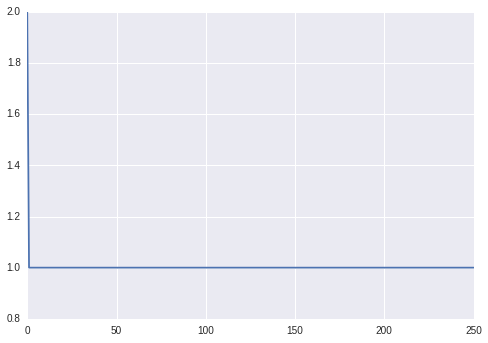

In [9]:
plt.plot(data['Investment Name'].value_counts())

#### Investment Name has only one category with 2 values otherwise all values are unique

In [10]:
#this column has almost all unique values, hence dropped
data = data.drop('Investment Name',axis=1)

In [11]:
data.head()

,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,...,L) Minority Serving Institutions,M) Geographic Region,M) Geographic Region 1,N) STEM Discipline Focus 12,Q) Legislation Required to Shift Focus?,S) Investment Partnerships,U) Measured Outputs,V) Outcomes Measured,X) Evaluated Since 2005?,target
0,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.24,7.19,5.70,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,...,No,National scope or not targeted to a geographic...,x,NaN,Don't know,Required,NaN,NaN,YES,1
1,National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,...,No,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NaN,YES,1
2,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.00,5.00,4.37,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,...,No,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NONE,YES,1
3,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,...,No,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,Number of learners (any age) served,NaN,YES,1
4,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,...,No,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NONE,YES,1


# Graphs 

In [12]:
non_funding = list(data.columns)
non_funding.remove('C1) Funding FY2008')
non_funding.remove('C2) Funding FY2009')
non_funding.remove('C3) Funding FY2010')

## Agency

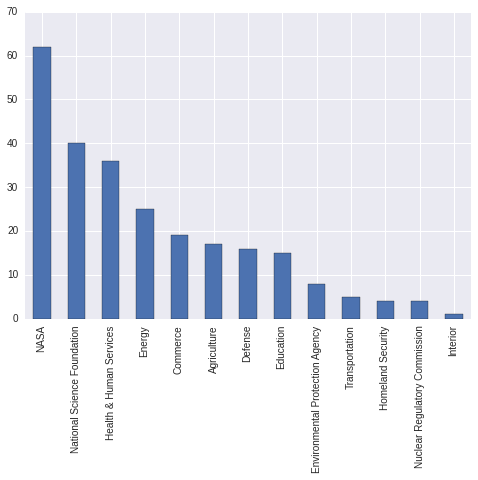

In [13]:
data['Agency'].value_counts().plot(kind='bar')

## 'Subagency'

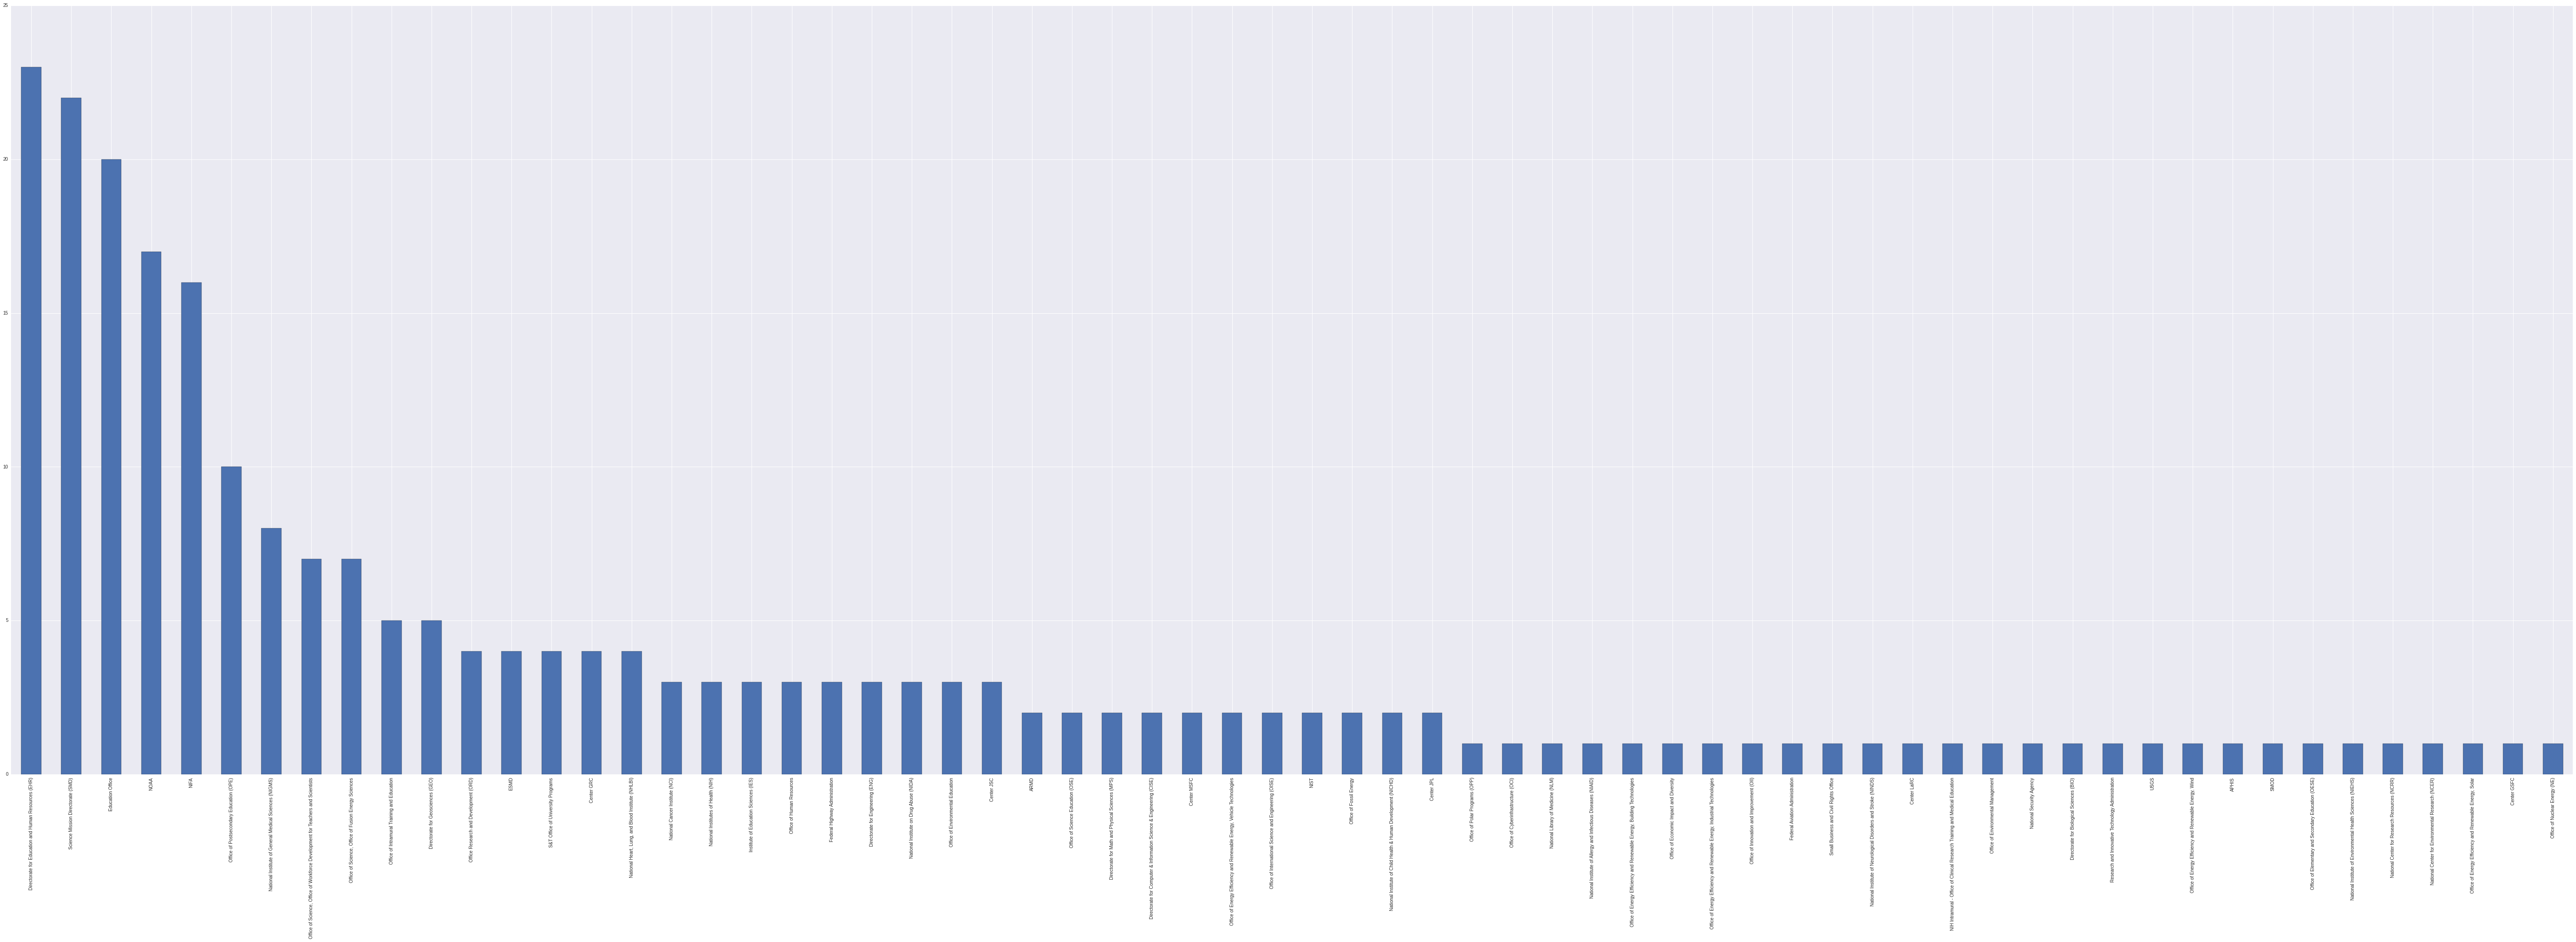

In [51]:
plt.figure(figsize=(100,30))
data['Subagency'].value_counts().plot(kind='bar')

## 'B) Year Established' 

### Grouping years into bins of decades for better visualisations

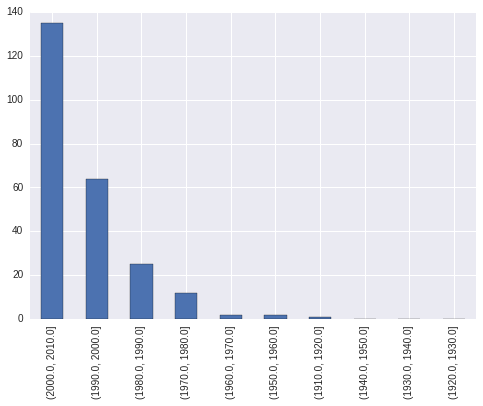

In [52]:
custom_bucket_array = np.linspace(1910,2010,11)
pd.cut(data['B) Year Established'], custom_bucket_array).value_counts().plot(kind='bar')

## D) Mission-specific or General STEM?

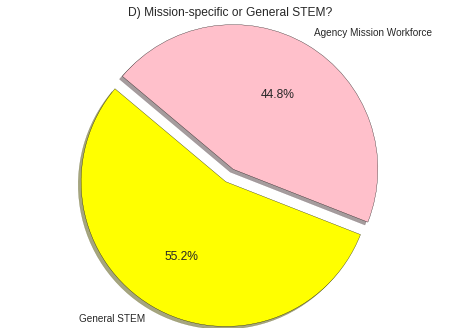

In [16]:
col = data['D) Mission-specific or General STEM?'].value_counts()
labels = col.index
sizes = col.values # The counts of the classes of D) Mission-specific or General STEM?
colors = ['yellow','pink']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('D) Mission-specific or General STEM?') 
plt.axis('equal')
plt.show()

##  'E) Agency or Mission-Related Workforce Needs?'

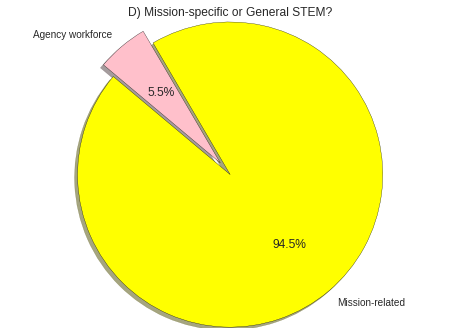

In [17]:
col = data['E) Agency or Mission-Related Workforce Needs?'].value_counts()
labels = col.index
sizes = col.values # The counts of the classes of D) Mission-specific or General STEM?
colors = ['yellow','pink']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('D) Mission-specific or General STEM?') 
plt.axis('equal')
plt.show()

## 'F1) Primary Investment Objective' 

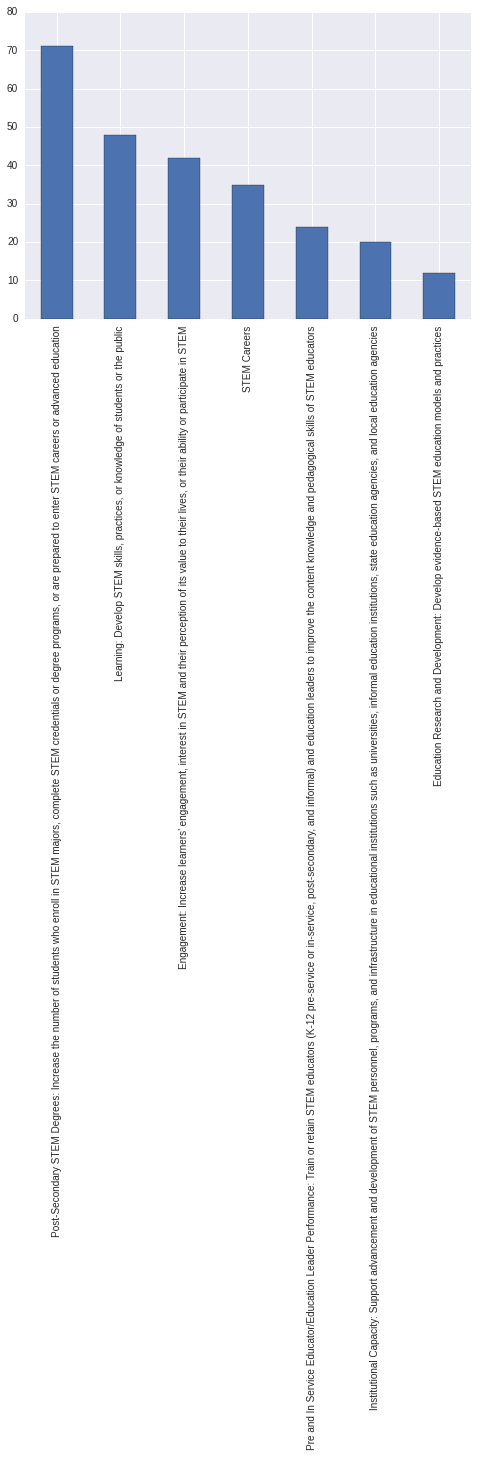

In [18]:
data['F1) Primary Investment Objective'].value_counts().plot(kind='bar')


## I have plotted graphs of only relevant features here as the file is getting too longer if I plot all the graphs.


## Hence, the graphs of all fetures are saved in graphs folder

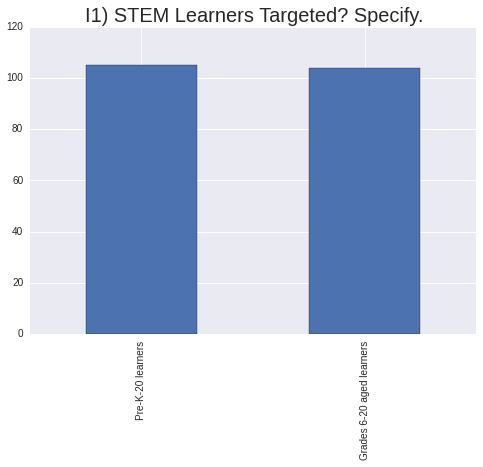

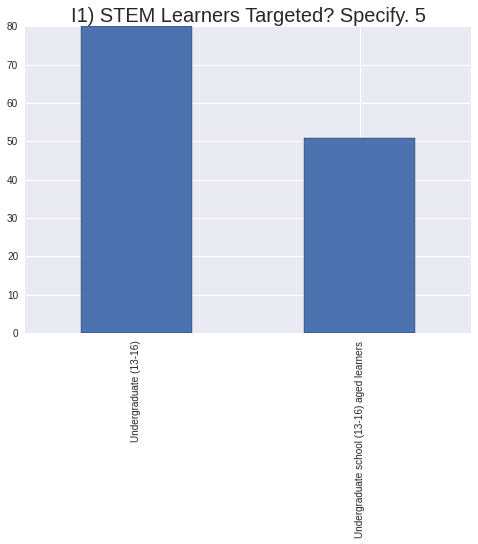

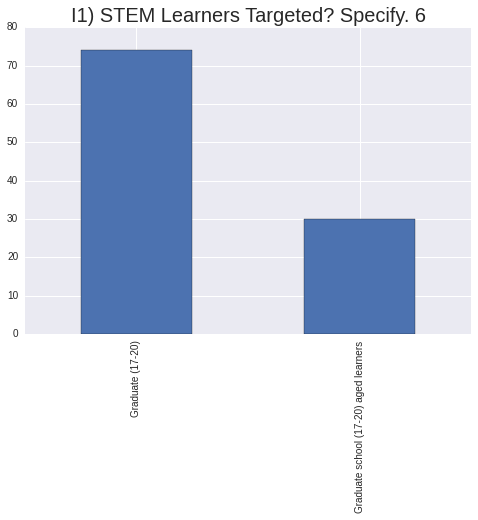

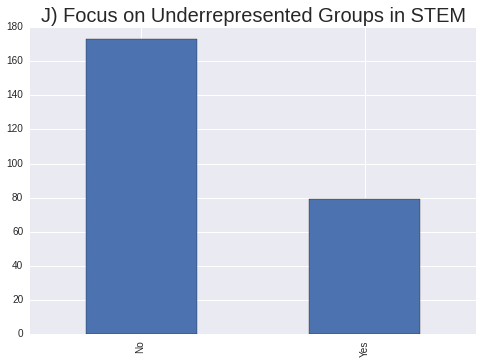

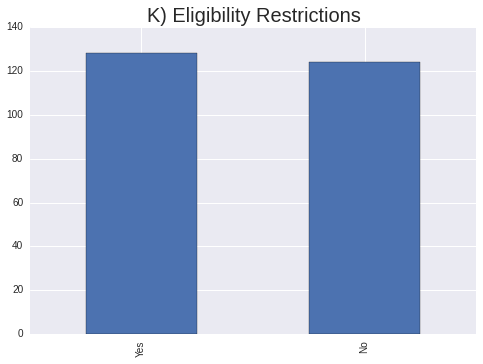

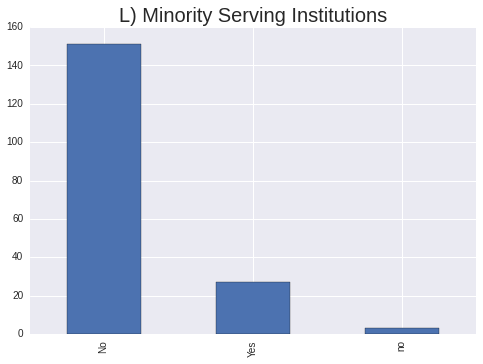

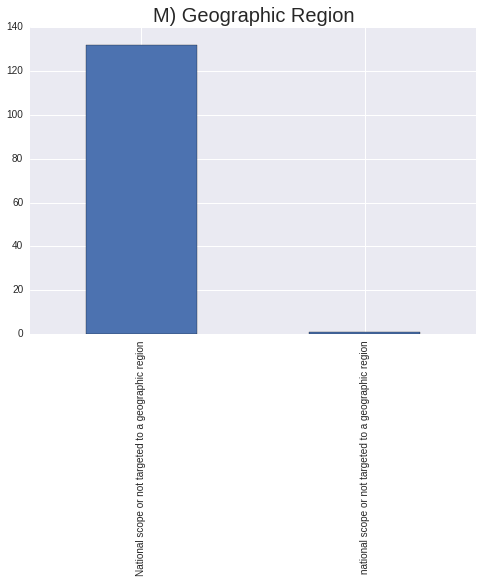

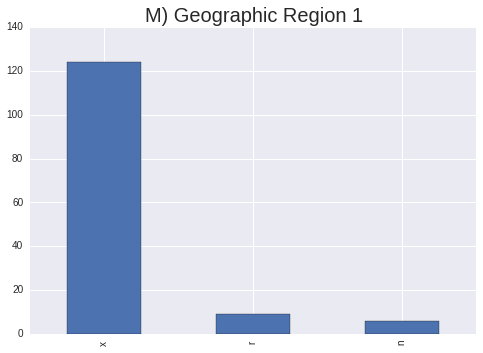

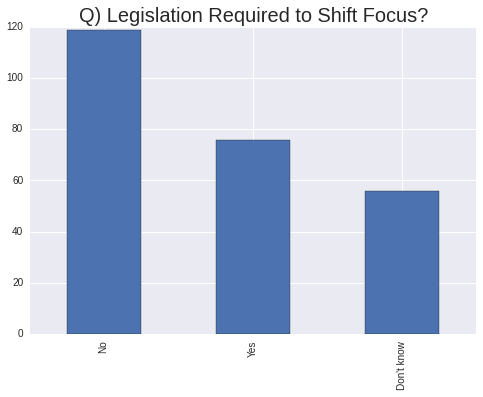

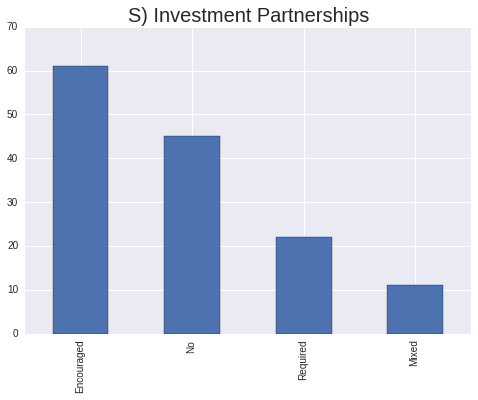

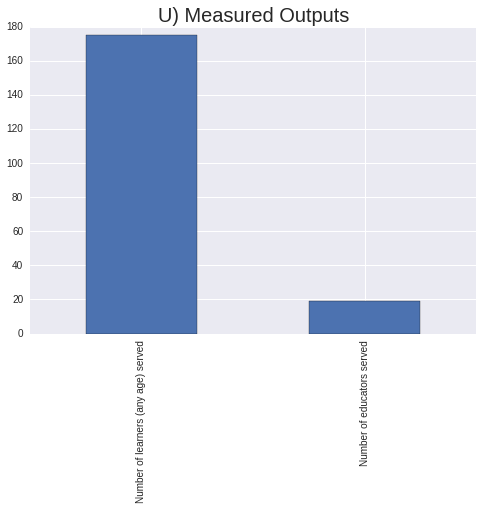

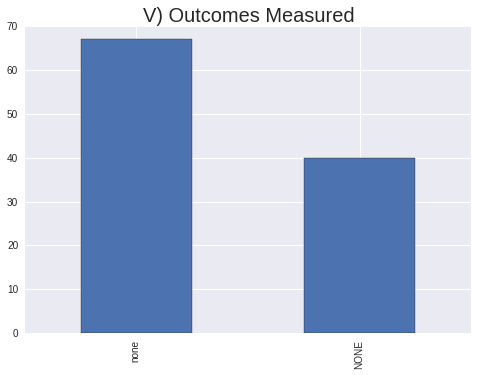

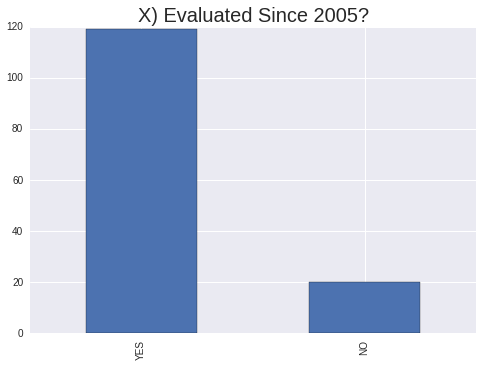

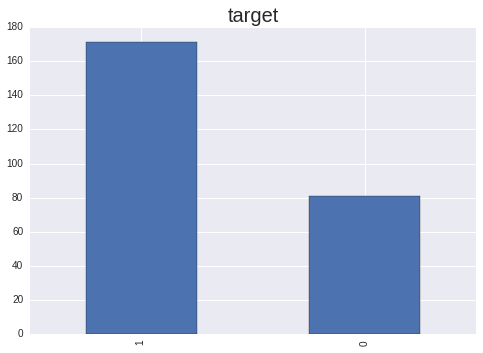

In [21]:
from matplotlib import pyplot as plt
for each in non_funding[6:]:
    plt.figure()
    plt.title(each,fontsize=20)
    data[each].value_counts().plot(kind='bar')
    plt.show()
    print('\n\n')


    
    

## For all other graphs

## Mutual_info_score

In [36]:
from sklearn.metrics import mutual_info_score
data = pd.read_csv('data.csv',index_col='Unnamed: 0')
def mutual(df2,y):
    lt=[]
    for i in df2.columns:
        j=df2[i]
        lt.append(mutual_info_score(j.values,y))
    mi_score=pd.DataFrame(lt,columns=["mutual info score"])
    mi_score["column name"]=df2.columns
    mi_score.set_index("column name",inplace=True)
    return mi_score

In [37]:
df1 = data
y1 = df1['target']
df1 = df1.drop('target',axis=1)

In [42]:
df1.fillna(0,inplace=True)
#6 and 9 for non- funding variables
for i in df1.columns[:6]:
    j=df1[i]
    j.replace(df1[df1[i]!=0][i].unique(),range(1,len(df1[df1[i]!=0][i].unique())+1),inplace=True)
for i in df1.columns[9:]:
    j=df1[i]
    j.replace(df1[df1[i]!=0][i].unique(),range(1,len(df1[df1[i]!=0][i].unique())+1),inplace=True)    
mutual_info_score = pd.concat([mutual(df1.iloc[:,0:6],y1),mutual(df1.iloc[:,9:],y1)])

In [46]:
i=0
for each in mutual_info_score['mutual info score']:
    print(mutual_info_score.index[i],"%.10f" % each)
    i=i+1

Index Number 0.6269885735
Investment Name 0.6215091492
Agency 0.0780911544
Subagency 0.2359158732
A) Brief Description 0.6269885735
B) Year Established 0.1383440971
D) Mission-specific or General STEM? 0.0031389439
E) Agency or Mission-Related Workforce Needs? 0.0079238311
F1) Primary Investment Objective 0.0287337850
F2) Secondary Investment Objectives 0.0001072615
F2) Secondary Investment Objectives 1 0.0058743142
F2) Secondary Investment Objectives 2 0.0059655786
F2) Secondary Investment Objectives 3 0.0005498939
F2) Secondary Investment Objectives 4 0.0061008156
F2) Secondary Investment Objectives 5 0.0138283531
F2) Secondary Investment Objectives 6 0.0080036385
F2) Secondary Investment Objectives 7 0.0001769553
F2) Secondary Investment Objectives 8 0.0019473178
F2) Secondary Investment Objectives 9 0.0819633858
G1) Primary Research Approaches 0.0001627263
G1) Primary Research Approaches 1 0.0017938119
G1) Primary Research Approaches 2 0.0046679354
G1) Primary Research Approaches 3